**INTRODUCTION:**

**Water Quality Analysis:**


Water plays a crucial role in sustaining life, serving essential functions like hydration, cooking, and maintaining cleanliness. However, its significance is dual, as contamination can lead to the emergence of harmful organisms causing severe health issues such as Typhoid Fever, Cholera, Giardia, Dysentery, Escherichia Coli, Hepatitis A, Salmonella, and polio. Understanding water quality is not only vital for personal well-being but also holds economic implications for nations and shapes the prospects of future generations. This analysis focuses on examining a dataset related to water quality, specifically differentiating between drinking and non-drinking water, with the objective of predicting potential outcomes.

THEME


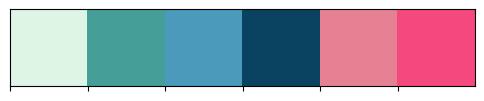

In [3]:
#importing all the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib as mlb
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn import tree
from IPython.core.display import display, HTML, Javascript
from string import Template
import json
import IPython.display


import warnings
warnings.filterwarnings("ignore")



#Setting the the theme and the Color palette
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193","#F5487F"]
print('THEME')
sns.palplot(sns.color_palette(theme))



In [4]:
Quality_df = pd.read_csv('/content/water_potability.csv')

**Dataset Analysis:**

In [5]:
Quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
Quality_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
Quality_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

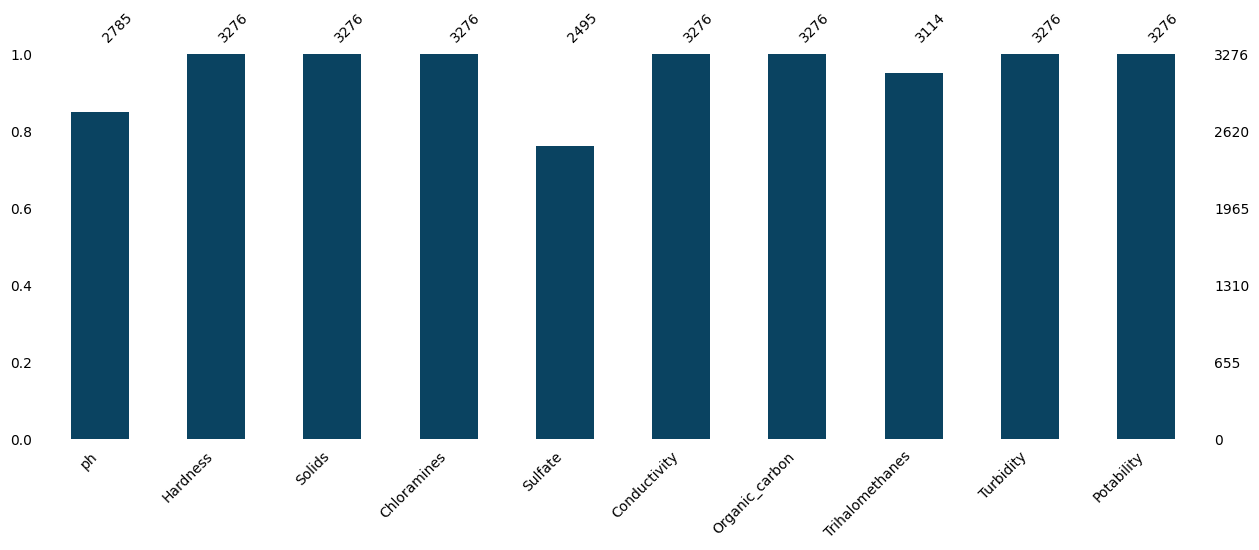

In [8]:

msno.bar(Quality_df,figsize=(15, 5),fontsize=10,color = '#0A4361')

In [9]:
#Checking for Null Values:

Quality_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

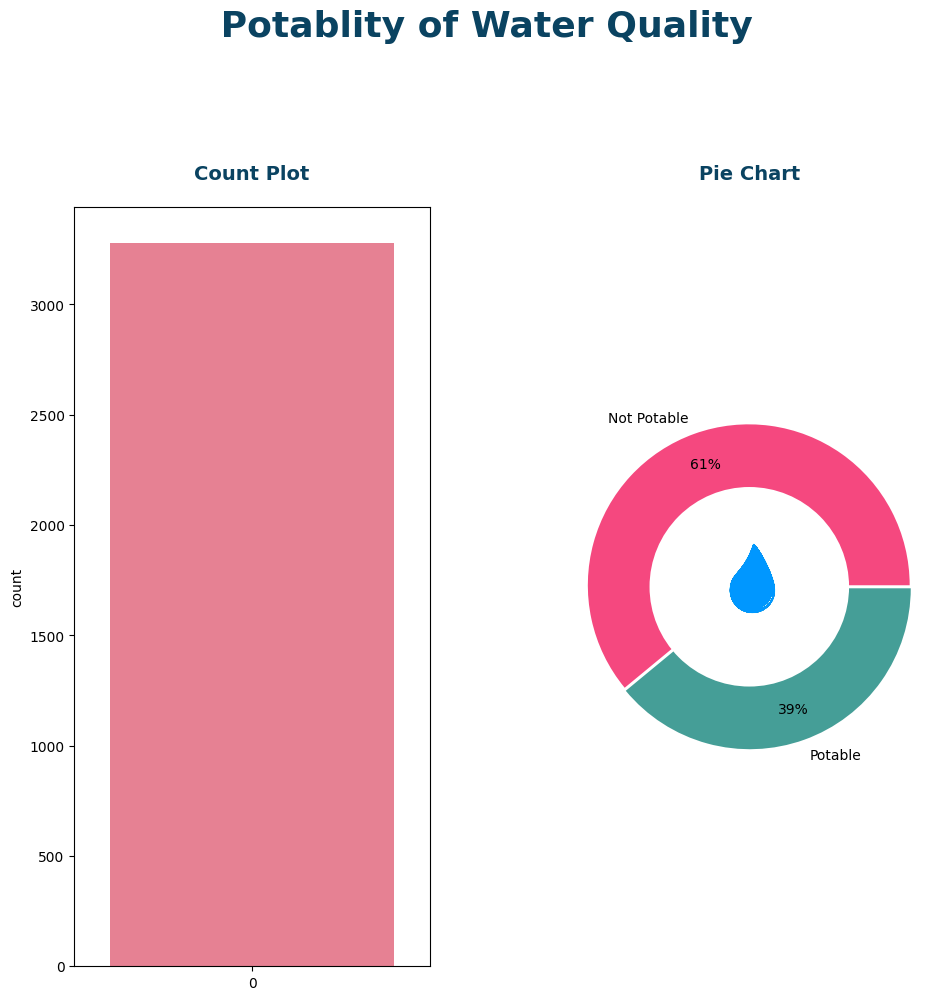

In [10]:
#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 11))
fig.suptitle(' Potablity of Water Quality ', size = 26, color = theme[3], weight='bold')
axs = [ax1, ax2]

#Count-Plot
sns.countplot(Quality_df['Potability'], ax=ax1, palette='husl')
ax1.set_title('Count Plot', size = 14, color = theme[3], weight='bold', pad=20)



#Secondary Data:
names = ["Not Potable", "Potable"]
values = Quality_df['Potability'].value_counts()
colors = ["#F5487F","#459E97"]
explode = (0.01, 0.01)

#Pie-chart
ax2.pie(x= values,labels =names, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode)

#Code to draw a circle
centre_circle = plt.Circle((0,0),0.62,fc='white')
ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.set_title('Pie Chart', size = 14, color = theme[3], weight='bold', pad=20)

#Importing the Image for water Drop

path = mpimg.imread('/content/water_drop.webp')
imagebox = OffsetImage(path , zoom=0.1)
xy = (0.5, 0.7)
ab = AnnotationBbox(imagebox, xy, frameon=False, pad=1, xybox=(0.02, 0.05))
ax2.add_artist(ab)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None);

**Dataset Pre-Processing for Further Analysis:**

In [11]:


#Replacing the Null values of Ph column with the mean values:

pH_0_1 = Quality_df.query('Potability == 1')['ph'][Quality_df['ph'] == 0].index
Quality_df.loc[pH_0_1,'ph'] = Quality_df.query('Potability == 1')['ph'][Quality_df['ph'] == 0 ].mean()
pH_nan_1 = Quality_df.query('Potability == 1')['ph'][Quality_df['ph'].isna()].index
Quality_df.loc[pH_nan_1,'ph'] = Quality_df.query('Potability == 1')['ph'][Quality_df['ph'].notna()].mean()
pH_0_0 = Quality_df.query('Potability == 0')['ph'][Quality_df['ph'] == 0].index
Quality_df.loc[pH_0_0,'ph'] = Quality_df.query('Potability == 0')['ph'][Quality_df['ph'] == 0 ].mean()
pH_nan_0 = Quality_df.query('Potability == 0')['ph'][Quality_df['ph'].isna()].index
Quality_df.loc[pH_nan_0,'ph'] = Quality_df.query('Potability == 0')['ph'][Quality_df['ph'].notna()].mean()

#Set any value that fails the guideline for pH not to be potable
Quality_df.loc[~Quality_df.ph.between(6.5, 8.5), 'Potability'] = 0




**PH:**


The recommended pH range for drinking water as established by the World Health Organization (WHO) spans from 6.5 to 8.5. Straying outside of these limits could lead to increased solubility of harmful metals.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

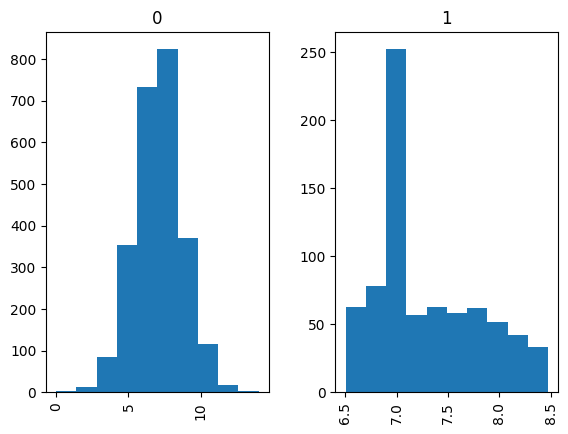

In [12]:

Quality_df.hist(column='ph', by='Potability')


<Axes: xlabel='ph', ylabel='Count'>

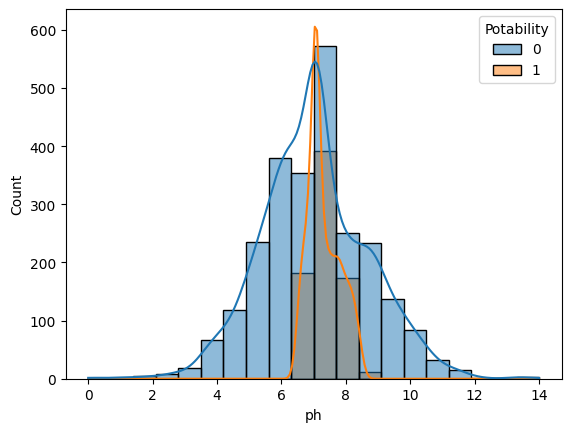

In [13]:
sns.histplot(data=Quality_df, x='ph', hue='Potability', kde=True, color='#0A4361', bins=20)



**Hardness**


Water hardness refers to the concentration of minerals, primarily calcium and magnesium ions, present in water. Consumable levels of water hardness are those that fall within the acceptable range for drinking water. The specific acceptable levels can vary depending on local regulations and guidelines. In general, water with moderate hardness is considered safe for consumption and does not pose health risks. However, extremely hard water may affect the taste and texture of water and could lead to health issues.

In some instances, consumers tolerate water hardness in excess of 500 mg/l.


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

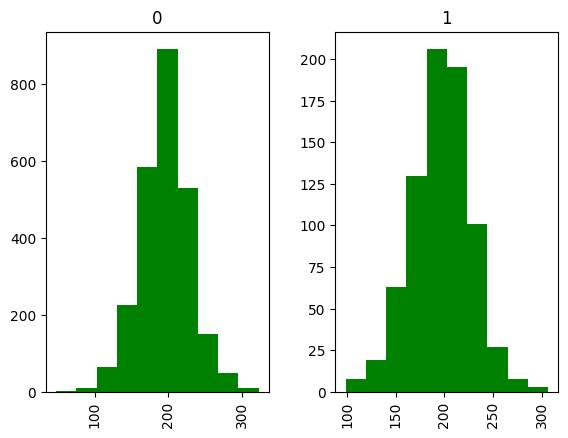

In [14]:


Quality_df.hist(column='Hardness', by='Potability',color='green')



<Axes: xlabel='Hardness', ylabel='Count'>

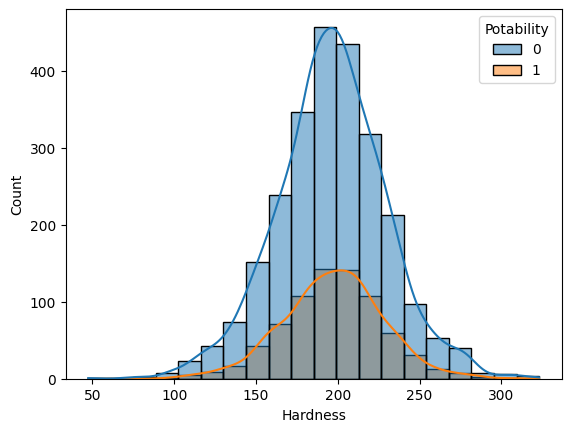

In [15]:
sns.histplot(data=Quality_df, x='Hardness', hue='Potability', kde=True, color='#4B9ABB', bins=20)

**Chloramines**

Safe drinking water is characterized by chlorine levels within the acceptable range of up to 4 milligrams per liter (mg/L) or 4 parts per million (ppm). Adjustments in chloramine levels are implemented to enhance the taste and odor of the water.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

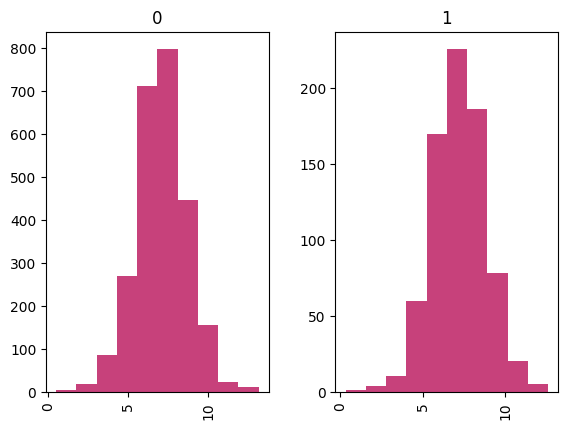

In [16]:
Quality_df.hist(column='Chloramines', by='Potability',color = "#C7417B")


<Axes: xlabel='Chloramines', ylabel='Count'>

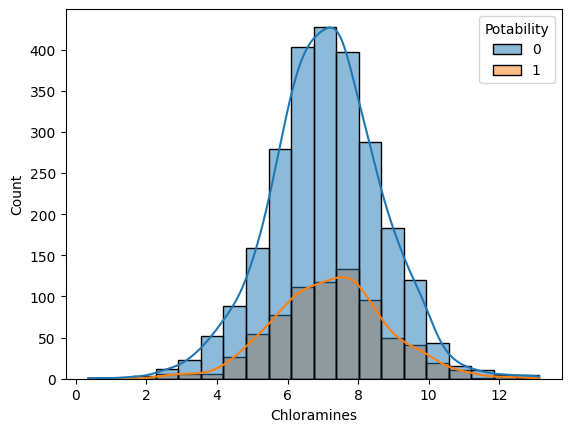

In [17]:
sns.histplot(data=Quality_df, x='Chloramines', hue='Potability', kde=True, color='#4B9ABB', bins=20)


The data shows thar there are large number of samples that are above the acceptable drinking limits

**Sulfate**

Typically, taste disturbance is minimal when sulfate levels are below 250 mg/l.

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

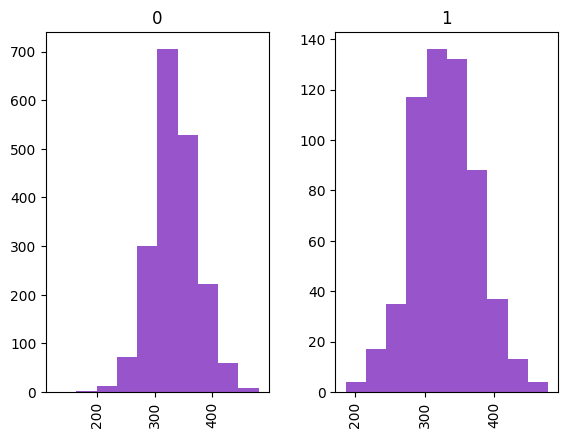

In [18]:


Quality_df.hist(column='Sulfate', by='Potability',color='#9854CB')



<Axes: xlabel='Sulfate', ylabel='Count'>

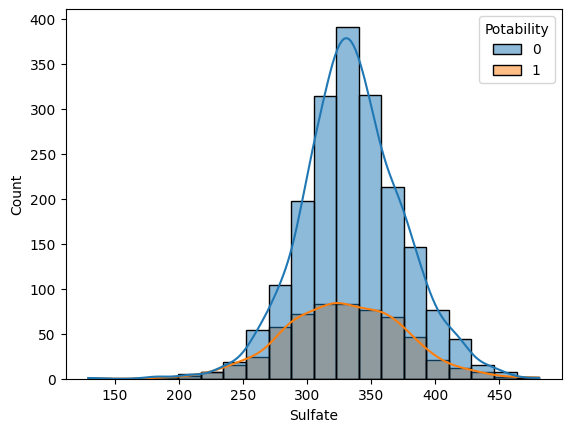

In [19]:
sns.histplot(data=Quality_df, x='Sulfate', hue='Potability', kde=True, color='#4B9ABB', bins=20)


**Conductivity**:

Water conductivity measures its ability to conduct an electric current, influenced by dissolved substances. It indicates the presence of charged particles like ions. Monitoring conductivity is crucial for assessing water quality, with high values possibly indicating contamination and low values suggesting a lack of essential minerals.









(array([  0.,  50., 100., 150., 200.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200')])

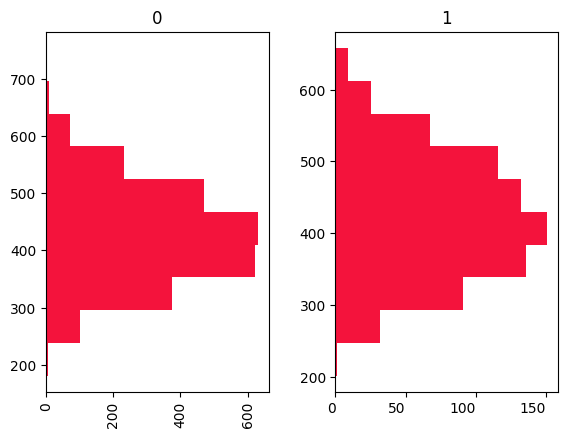

In [20]:
Quality_df.hist(column='Conductivity', by='Potability',orientation='horizontal',color='#f4133c')
plt.xticks(rotation=-360, ha="right")

<Axes: xlabel='Conductivity', ylabel='Count'>

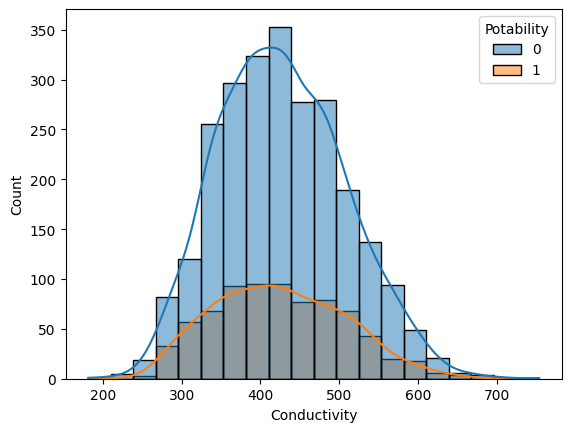

In [21]:
sns.histplot(data=Quality_df, x='Conductivity', hue='Potability', kde=True, color='#4B9ABB', bins=20)


The acceptable levels of conductivity in water vary depending on its use. Generally, for drinking water, the conductivity should be relatively low, typically below 500 microsiemens per centimeter (µS/cm) to ensure its safety and quality. However, specific standards may vary among regulatory bodies and regions, so it is essential to refer to local guidelines for precise recommendations.

Again some of the conductivity values of the samples calssified potable exceed the stated limits. Note again that we have no values that are close to seawater which contracts the Solids (TDS) values.


**Total Organic Carbon (TOC)**

According to US EPA < 2 mg/L as TOC in treated / drinking water

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

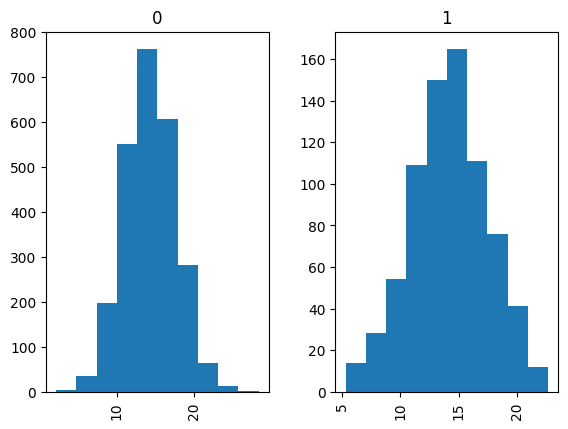

In [22]:
Quality_df.hist(column='Organic_carbon', by='Potability')

<Axes: xlabel='Organic_carbon', ylabel='Count'>

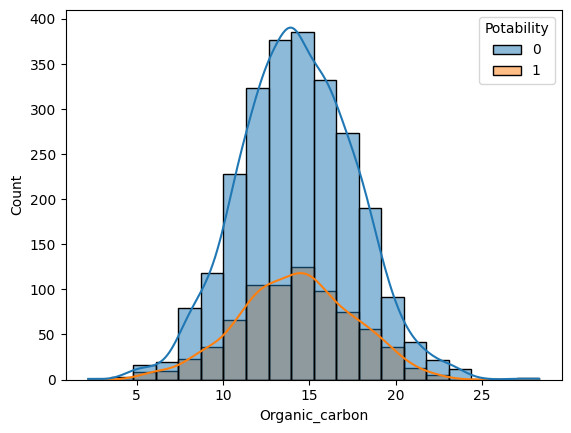

In [23]:
sns.histplot(data=Quality_df, x='Organic_carbon', hue='Potability', kde=True, color='#4B9ABB', bins=20)


**Trihalomethanes**

THM levels up to 80 ppm is considered safe in drinking water.


(array([  0.,  50., 100., 150., 200.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200')])

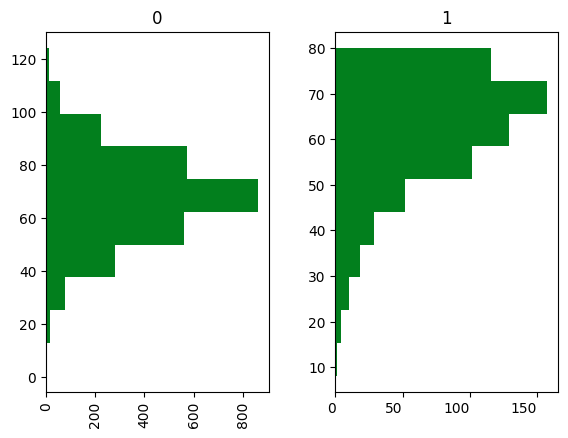

In [24]:


#first replace the Nan values with the mean of the classification
THM_nan_1 = Quality_df.query('Potability == 1')['Trihalomethanes'][Quality_df['Trihalomethanes'].isna()].index
Quality_df.loc[THM_nan_1,'Trihalomethanes'] = Quality_df.query('Potability == 1')['Trihalomethanes'][Quality_df['Trihalomethanes'].notna()].mean()
THM_nan_0 = Quality_df.query('Potability == 0')['Trihalomethanes'][Quality_df['Trihalomethanes'].isna()].index
Quality_df.loc[THM_nan_0,'Trihalomethanes'] = Quality_df.query('Potability == 0')['Trihalomethanes'][Quality_df['Trihalomethanes'].notna()].mean()
#Set any value that fails the guideline for Trihalomethanes not to be potable
Quality_df.loc[Quality_df.Trihalomethanes > 80, 'Potability'] = 0





Quality_df.hist(column='Trihalomethanes', by='Potability',orientation='horizontal',color='#027f1d')
plt.xticks(rotation=-360, ha="right")

<Axes: xlabel='Trihalomethanes', ylabel='Count'>

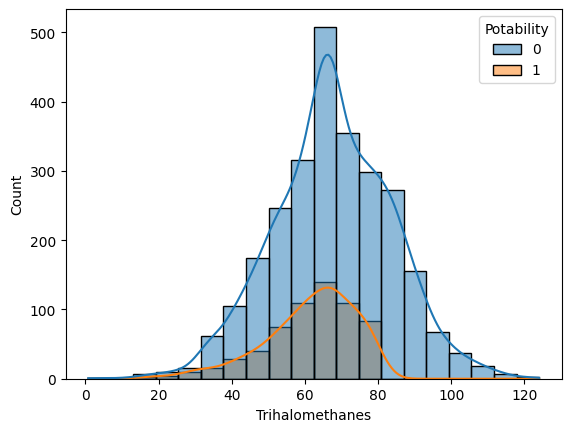

In [25]:
sns.histplot(data=Quality_df, x='Trihalomethanes', hue='Potability', kde=True, color='#4B9ABB', bins=20)



Many samples classified potable would not pass the US EPA


**Turbidity**

WHO recommended value below 5.00 NTU, ideally below 1 NTU

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

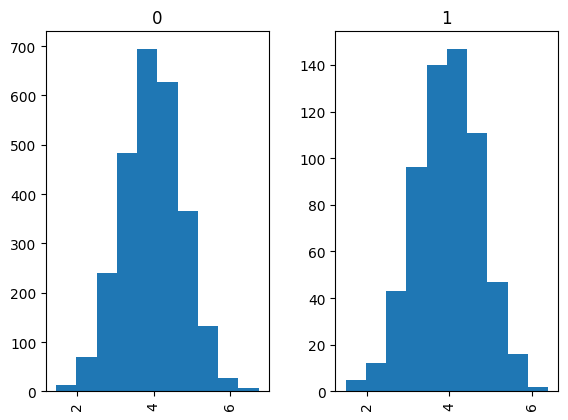

In [26]:


Quality_df.hist(column='Turbidity', by='Potability')





Again some of the samples classified as potable are above the limits


<Axes: xlabel='Turbidity', ylabel='Count'>

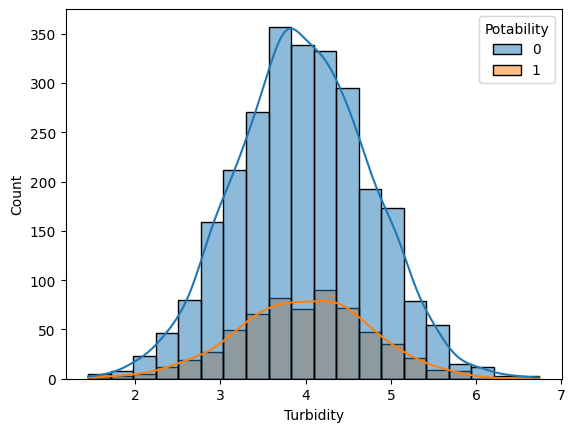

In [27]:
sns.histplot(data=Quality_df, x='Turbidity', hue='Potability', kde=True, color='#4B9ABB', bins=20)

Text(0.5, 1.08, ' Distribution of features ')

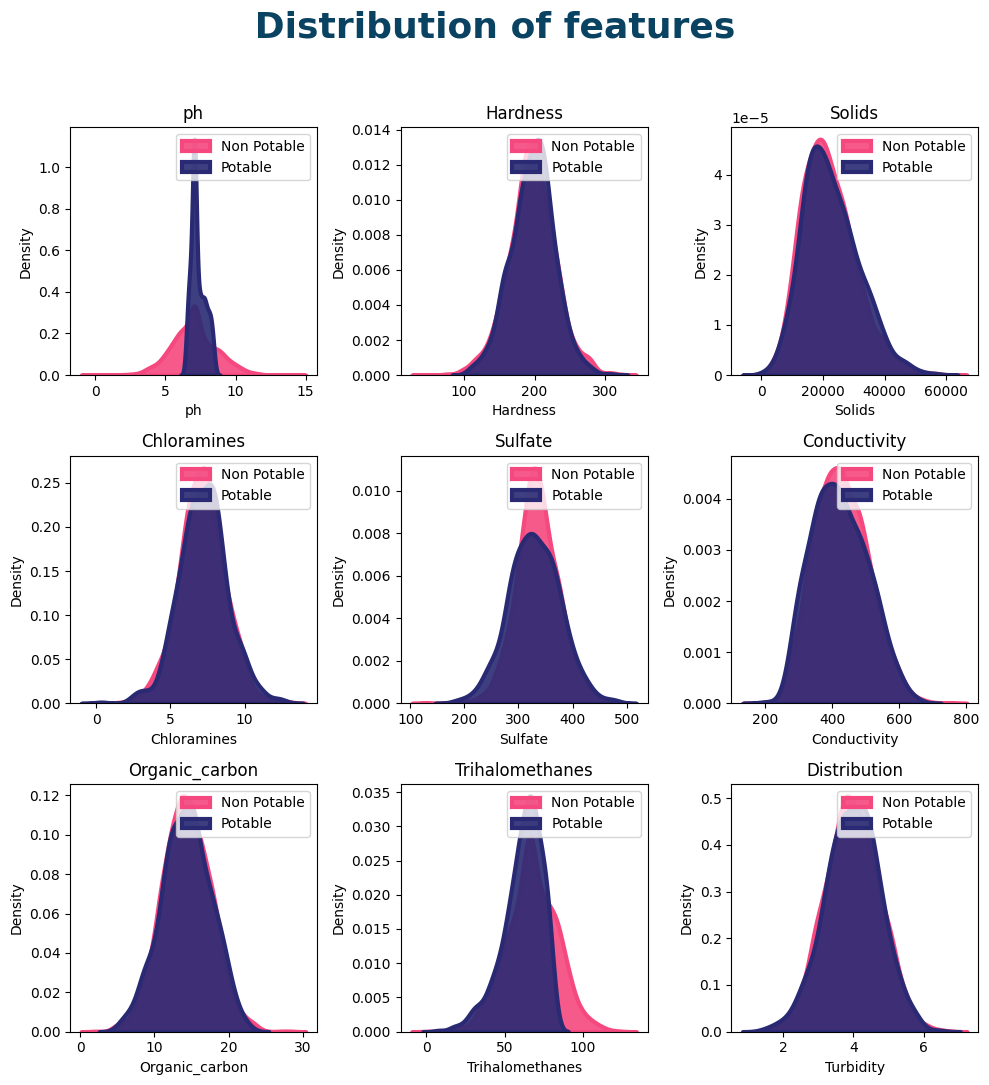

In [28]:

non_potable = Quality_df.query("Potability == 0")
potable = Quality_df.query("Potability == 1")

plt.figure(figsize = (10,10))
for ax, col in enumerate(Quality_df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = non_potable[col], label = "Non Potable",fill=True, common_norm=False, color="#F5487F",alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = potable[col], label = "Potable",fill=True, common_norm=False, color="#292A73",alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.08, size = 26, color = theme[3], weight='bold')

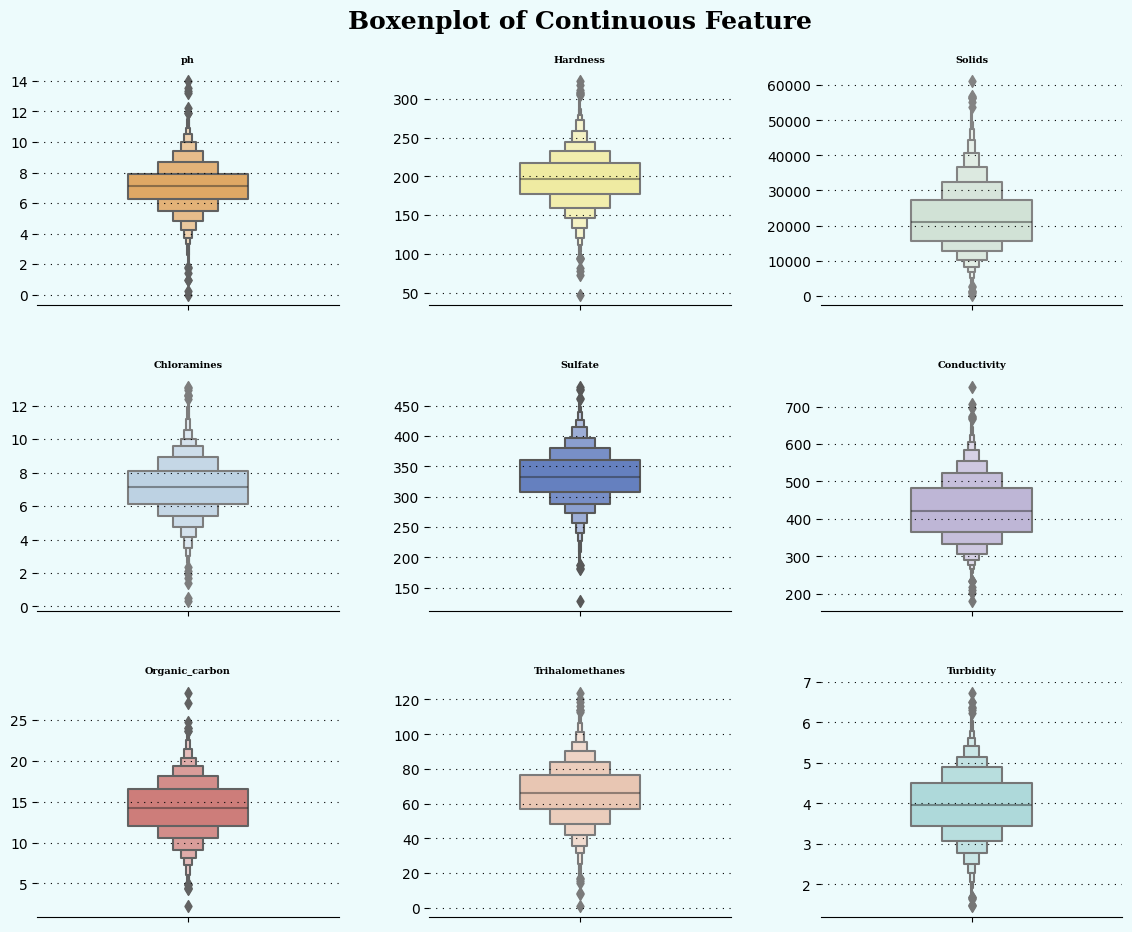

In [29]:
background_color = '#edfbfc'
color_palette = ['#F3AA51', '#FCF695', '#CEE5D5', '#B7D3E9', '#567ACE', '#BBB0DC', '#DB706C', '#F1C3AA','#A7E0E1', 'D9598C']

fig = plt.figure(figsize=(14, 11))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

fig.patch.set_facecolor(background_color)

# Title
ax1.text(0, 400, 'Boxenplot of Continuous Feature',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')


# Graphs
for i, ax in enumerate(axes):
    ax.set_facecolor(background_color)
    ax.set_title(Quality_df.columns[i], fontsize=7, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))

    sns.boxenplot(y=Quality_df.columns[i], data=Quality_df, ax=ax, palette=[color_palette[i]], width=0.4)
    ax.set_xlabel('')
    ax.set_ylabel('')

    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)



<Axes: >

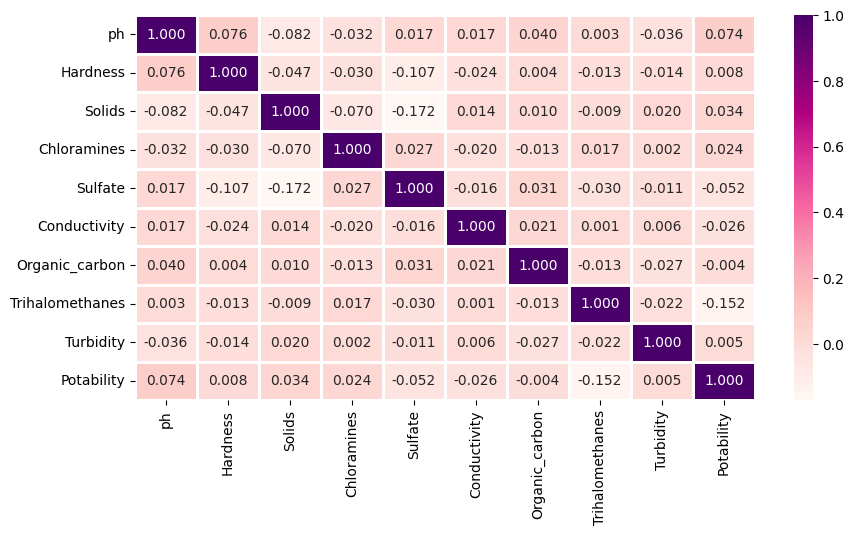

In [30]:
#Heatmap Plot


plt.figure(figsize=(10,5))
sns.heatmap(Quality_df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

### ***ML Models Analysis: ***


In [31]:
Quality_df.isnull().sum()


ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [32]:
Quality_df["Sulfate"].fillna(value = Quality_df["Sulfate"].mean(), inplace = True)


In [33]:
Quality_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [34]:
#Linear Regression:

#Importing the ML libraries:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree



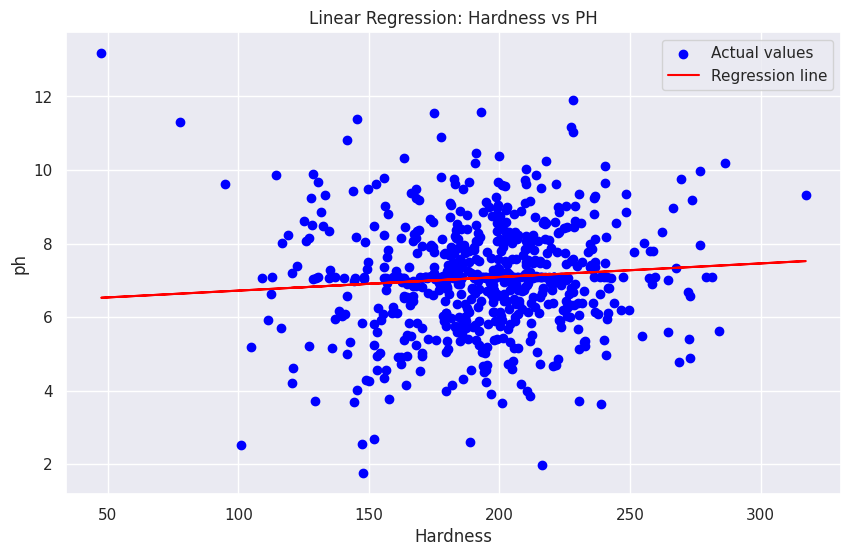

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Selecting the variables
X = Quality_df[['Hardness']]
y = Quality_df['ph']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Regression line')


plt.xlabel('Hardness')
plt.ylabel('ph')
plt.title('Linear Regression: Hardness vs PH')
plt.legend()
plt.show()

In [36]:
import plotly.express as px
fig = px.scatter (Quality_df, x = "Sulfate", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

**Logistic Regression: **

In [37]:
#Split and Train the model

from sklearn.model_selection import train_test_split as test
from sklearn.linear_model import LogisticRegression

x = Quality_df.drop(['Potability'],axis=True)
y = Quality_df['Potability']


x_train,x_test,y_train,y_test = test(x,y,test_size=0.32, random_state = 50)





In [38]:


print(x.describe(),"\n","\n", y.describe())



                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080855   196.369496  22014.092526     7.122277   333.775777   
std       1.469958    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.085378   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.395706     3.966786  
std       80.824064        3.308162        15.769892     0.780382  
min      181.483754        2.200000         0.738000

In [39]:

logi = LogisticRegression(max_iter = 120, random_state=0,n_jobs=20)
logi.fit(x_train,y_train)
predlogi_y = logi.predict(x_test)



In [40]:
Acc= accuracy_score(predlogi_y,y_test)
print( Acc)

0.8045757864632984


In [41]:


print(classification_report(y_test,predlogi_y))



              precision    recall  f1-score   support

           0       0.81      1.00      0.89       846
           1       0.00      0.00      0.00       203

    accuracy                           0.80      1049
   macro avg       0.40      0.50      0.45      1049
weighted avg       0.65      0.80      0.72      1049



In [43]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

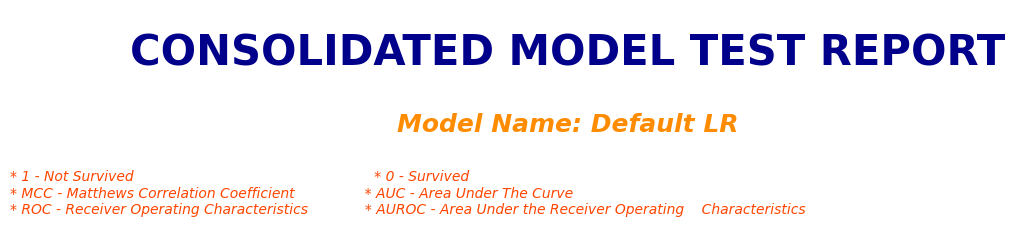

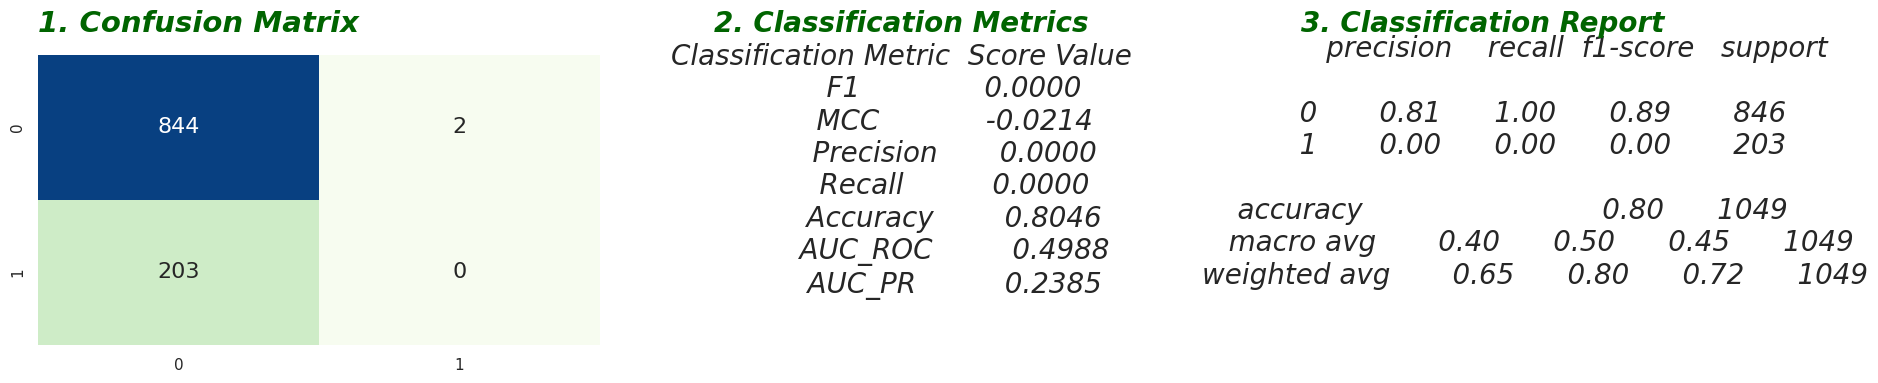

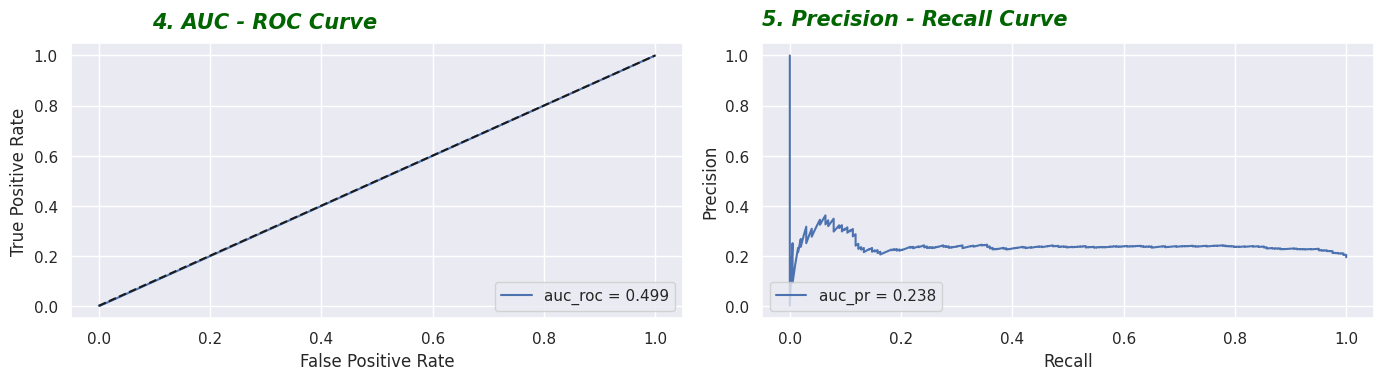

In [44]:
utils.Generate_Model_Test_Classification_Report(logi, x_test, y_test, model_name="Default LR")

**Decision Trees:**

In [45]:
#Using Decision Tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

predication = dt.predict(x_test)




In [46]:
score = dt.score(x_test, y_test)
print(score)

0.8551000953288846


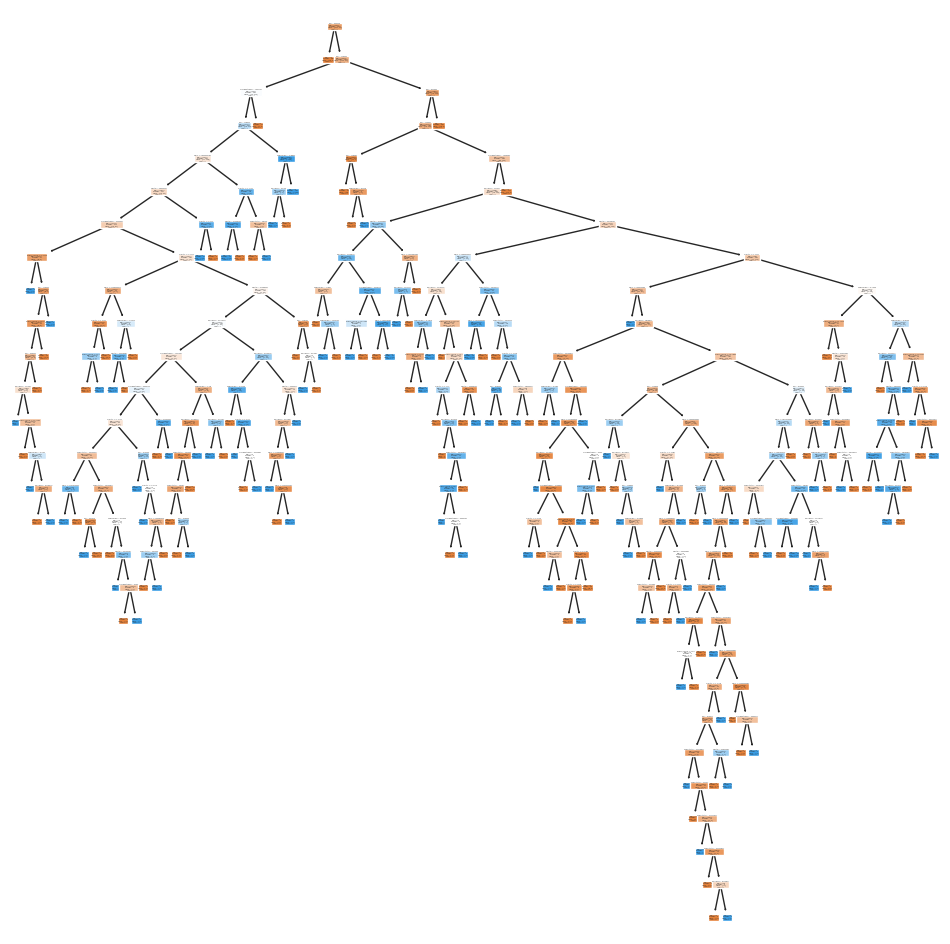

In [47]:
# Visualize Decision Tree
plt.figure(figsize = (12,12))
tree.plot_tree(dt,
               feature_names =  Quality_df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()


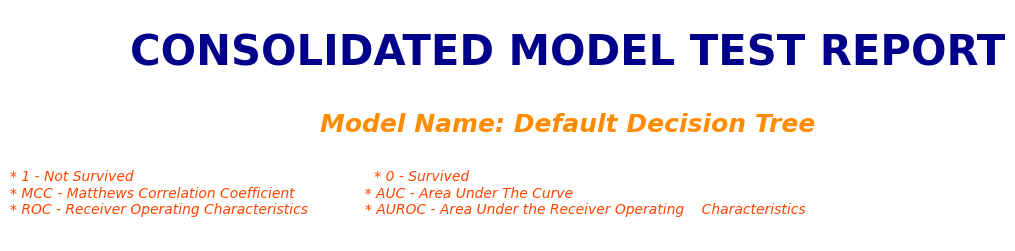

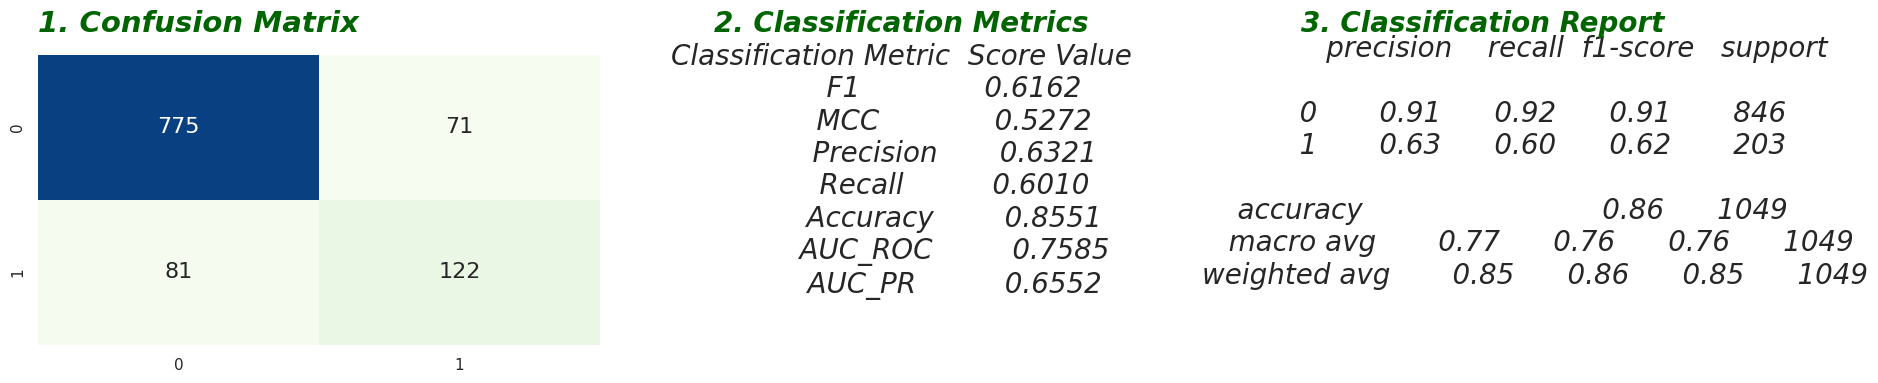

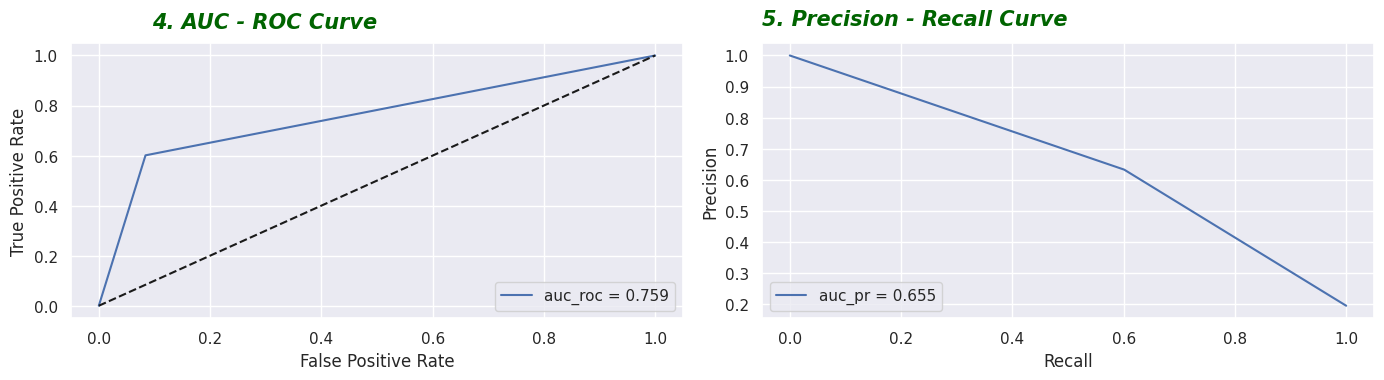

In [48]:
utils.Generate_Model_Test_Classification_Report(dt, x_test, y_test, model_name="Default Decision Tree")

**Random Forest Model:**

In [49]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_RFC = RFC.predict(x_test)

In [50]:


Acc_rfc= accuracy_score(y_RFC,y_test)
print( Acc_rfc)



0.8541468064823642


In [51]:
print(classification_report(y_RFC,y_test))


              precision    recall  f1-score   support

           0       0.96      0.87      0.91       935
           1       0.40      0.72      0.52       114

    accuracy                           0.85      1049
   macro avg       0.68      0.79      0.72      1049
weighted avg       0.90      0.85      0.87      1049



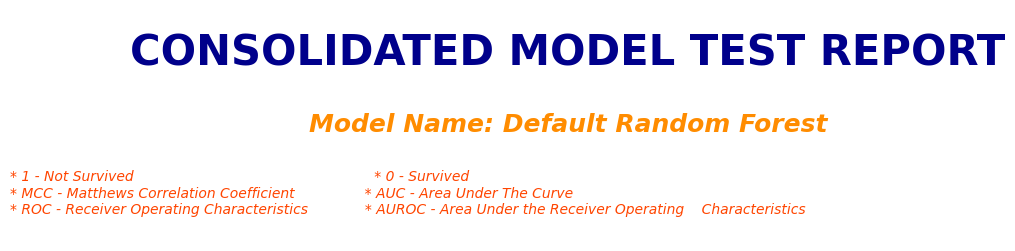

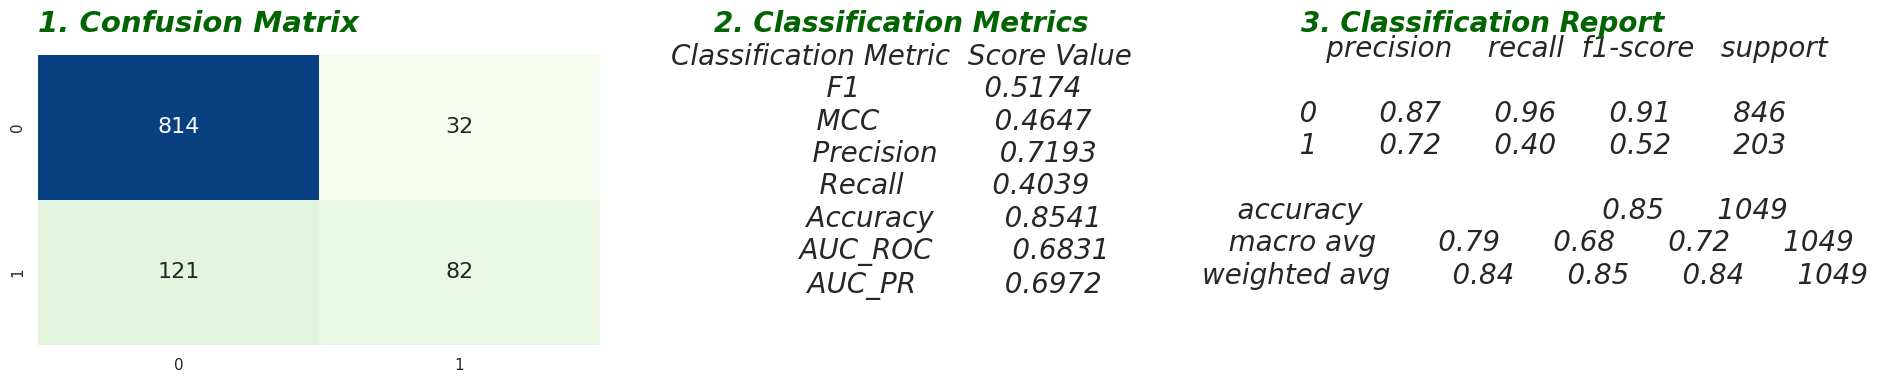

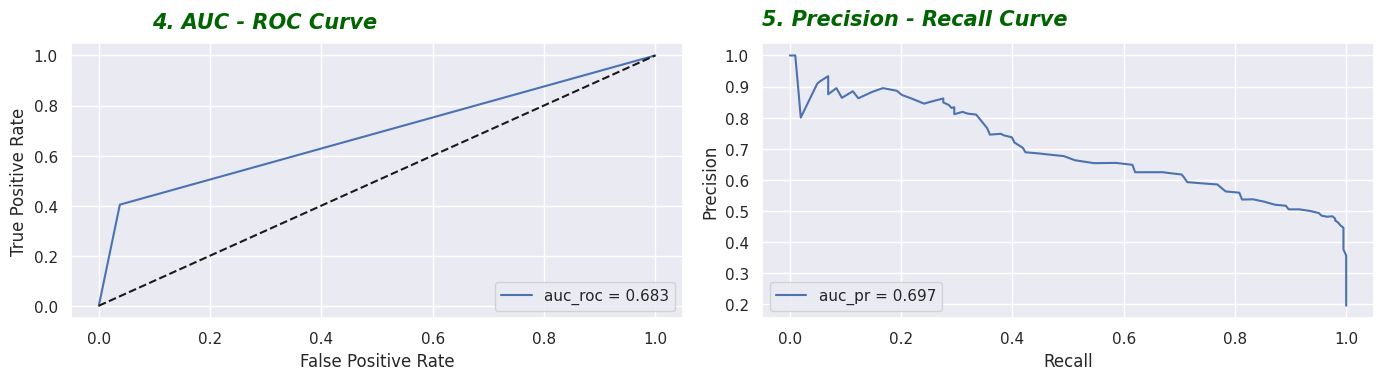

In [52]:
utils.Generate_Model_Test_Classification_Report(RFC, x_test, y_test, model_name="Default Random Forest")

In [53]:
models = pd.DataFrame({"Model":['Logistic','Random Forest','Decision Tree'],
           "Accuracy":[Acc,Acc_rfc,score
]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,0.855100
1,Random Forest,0.854147
0,Logistic,0.804576


### **Conclusion:**

We see different accuracy levels with  different models. However, the most accurate model was Random Forest which had an accouracy of 85 percent. The is slightly higher than the decision tree models as random forest is built on top of decision trees or multiple decision trees feedback.

**References:**


Random Forest Model Concept:  https://www.youtube.com/watch?v=PHxYNGo8NcI

Linear Regression Model: https://learn.microsoft.com/en-us/analysis-services/data-mining/microsoft-linear-regression-algorithm?view=asallproducts-allversions